<a href="https://colab.research.google.com/github/alvinnoza-ph/viz-kalimantan-wildfires/blob/master/notebook/Viz_Kalimantan_Wildfires_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis on Kalimantan's Active Fires as Observed by VIIRS in 2021 (Part 2: Visualization)**

## 2. Data Visualization

In this section, we'll try to visualize the active fires using our preprocessed dataset.

### 2.1 Import Libraries and Load Datasets

In [1]:
## import libraries
import numpy as np
import pandas as pd
import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
pd.options.display.max_columns = 100

%matplotlib inline

In [3]:
!pip install geopandas
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from shapely import wkt ## parse well-known text (WKT) geometry columns

In [4]:
!pip install geopy
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='latlongconvert')

In [5]:
## connect notebook ke google drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
## load preprocessed dataset
df = pd.read_csv("/content/gdrive/MyDrive/wildfires/filtered-kalimantan-active-fires.csv")

df.head(2)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type,province,city,district,boundary
0,-2.159446,115.582207,328.70,0.39,0.36,2021-01-01,542,N,VIIRS,n,1,286.21,2.28,D,2,Kalimantan Selatan,Tabalong,Upau,POLYGON Z ((115.5886395980001 -2.1662300429999...
1,0.633645,117.544212,300.13,0.33,0.55,2021-01-02,1806,N,VIIRS,n,1,275.48,0.84,N,2,Kalimantan Timur,Kutai Timur,Sangatta Utara,POLYGON Z ((117.6590002800001 0.59211592300005...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17347 entries, 0 to 17346
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    17347 non-null  float64
 1   longitude   17347 non-null  float64
 2   bright_ti4  17347 non-null  float64
 3   scan        17347 non-null  float64
 4   track       17347 non-null  float64
 5   acq_date    17347 non-null  object 
 6   acq_time    17347 non-null  int64  
 7   satellite   17347 non-null  object 
 8   instrument  17347 non-null  object 
 9   confidence  17347 non-null  object 
 10  version     17347 non-null  int64  
 11  bright_ti5  17347 non-null  float64
 12  frp         17347 non-null  float64
 13  daynight    17347 non-null  object 
 14  type        17347 non-null  int64  
 15  province    17347 non-null  object 
 16  city        17347 non-null  object 
 17  district    17347 non-null  object 
 18  boundary    17347 non-null  object 
dtypes: float64(7), int64(3), 

Convert to GeoDataFrame. The following cell converts the Well-Known Text (WKT) geometry information contained in the `boundary` column from a string type to a geometry.

In [8]:
df["boundary"] = df["boundary"].apply(wkt.loads)
df_gpd = gpd.GeoDataFrame(df, geometry="boundary", crs="EPSG:4326")

In [9]:
df_gpd.head(2)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type,province,city,district,boundary
0,-2.159446,115.582207,328.70,0.39,0.36,2021-01-01,542,N,VIIRS,n,1,286.21,2.28,D,2,Kalimantan Selatan,Tabalong,Upau,"POLYGON Z ((115.58864 -2.16623 0.00000, 115.58..."
1,0.633645,117.544212,300.13,0.33,0.55,2021-01-02,1806,N,VIIRS,n,1,275.48,0.84,N,2,Kalimantan Timur,Kutai Timur,Sangatta Utara,"POLYGON Z ((117.65900 0.59212 0.00000, 117.660..."


In [10]:
df_gpd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17347 entries, 0 to 17346
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   latitude    17347 non-null  float64 
 1   longitude   17347 non-null  float64 
 2   bright_ti4  17347 non-null  float64 
 3   scan        17347 non-null  float64 
 4   track       17347 non-null  float64 
 5   acq_date    17347 non-null  object  
 6   acq_time    17347 non-null  int64   
 7   satellite   17347 non-null  object  
 8   instrument  17347 non-null  object  
 9   confidence  17347 non-null  object  
 10  version     17347 non-null  int64   
 11  bright_ti5  17347 non-null  float64 
 12  frp         17347 non-null  float64 
 13  daynight    17347 non-null  object  
 14  type        17347 non-null  int64   
 15  province    17347 non-null  object  
 16  city        17347 non-null  object  
 17  district    17347 non-null  object  
 18  boundary    17347 non-null  geometry
d

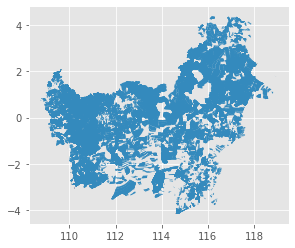

In [11]:
df_gpd["boundary"].plot()

In [12]:
YM = [i.split(" ")[0][:-3] for i in  list(df_gpd['acq_date'])]
df_gpd["year-month"] = YM
df_gpd["month"] = df_gpd["year-month"].astype("datetime64[ns]").dt.month_name().str.slice(stop=3)
df_gpd.head(2)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type,province,city,district,boundary,year-month,month
0,-2.159446,115.582207,328.70,0.39,0.36,2021-01-01,542,N,VIIRS,n,1,286.21,2.28,D,2,Kalimantan Selatan,Tabalong,Upau,"POLYGON Z ((115.58864 -2.16623 0.00000, 115.58...",2021-01,Jan
1,0.633645,117.544212,300.13,0.33,0.55,2021-01-02,1806,N,VIIRS,n,1,275.48,0.84,N,2,Kalimantan Timur,Kutai Timur,Sangatta Utara,"POLYGON Z ((117.65900 0.59212 0.00000, 117.660...",2021-01,Jan


In [13]:
grouped = df_gpd["frp"].groupby([df_gpd["province"], df_gpd["year-month"], df_gpd["month"]]).agg("count").reset_index()
grouped.columns = ["province", "year-month", "month", "active fires"]
grouped.head(2)

,province,year-month,month,active fires
0,Kalimantan Barat,2021-01,Jan,52
1,Kalimantan Barat,2021-02,Feb,1871


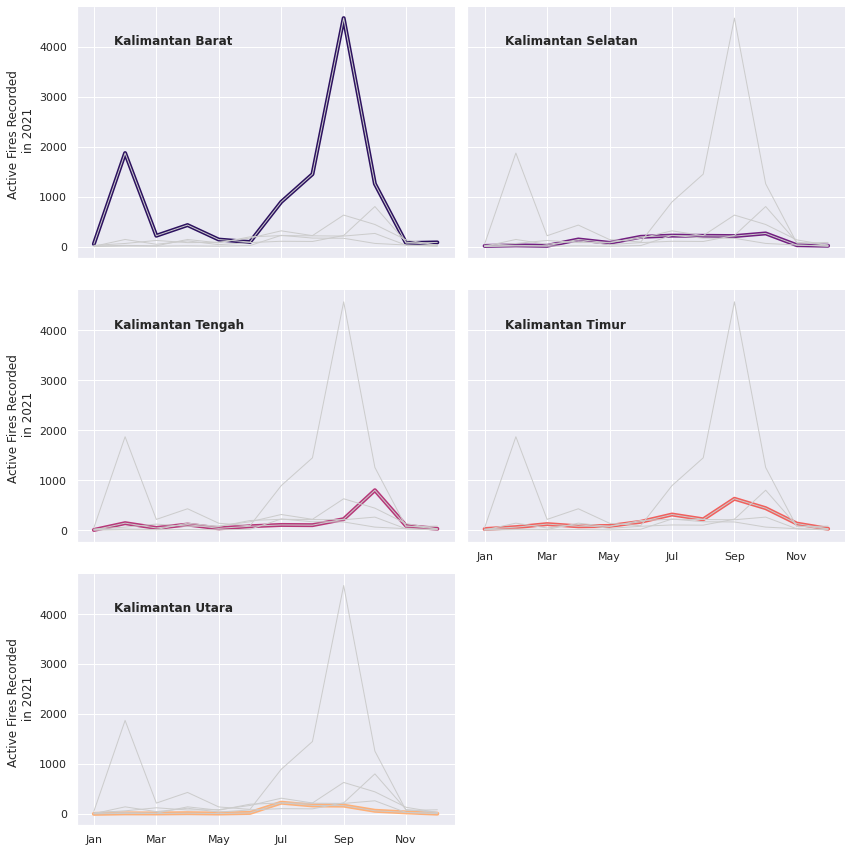

In [31]:
sns.set_theme(style="dark")
sns.set_style("darkgrid")

## plot each month time series in its own facet
monthly = sns.relplot(data=grouped,
                      x="month", y="active fires",
                      col="province", hue="province",
                      kind="line", palette="magma",
                      linewidth=4, zorder=2,
                      col_wrap=2, height=4, aspect=1.5, legend=False)

## Iterate over each subplot to customize further
for month, ax in monthly.axes_dict.items():

    ## Add the title as an annotation within the plot
    ax.text(.1, .85, month, transform=ax.transAxes, fontweight="bold")

    ## plot every month time series in the background
    sns.lineplot(
        data=grouped, x="month", y="active fires", units="province",
        estimator=None, color=".8", linewidth=1, ax=ax
    )

## reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
monthly.set_titles("")
monthly.set_axis_labels("", "Active Fires Recorded \n in 2021")
monthly.tight_layout()

monthly.savefig("/content/gdrive/MyDrive/wildfires/active-fires-monthly.png") 

In [15]:
df_crosstab = pd.crosstab(df_gpd["daynight"], df_gpd["province"],
                          margins=True, normalize=False)

df_crosstab.head()

province,Kalimantan Barat,Kalimantan Selatan,Kalimantan Tengah,Kalimantan Timur,Kalimantan Utara,All
daynight,,,,,,
D,10081,720,1578,1534,714,14627
N,1042,695,196,777,10,2720
All,11123,1415,1774,2311,724,17347


In [16]:
# to percentage
perc1 = (df_crosstab.loc["All"]/df_crosstab["All"].loc["All"]) * 100
perc2 = ((df_crosstab["All"].loc["All"]-df_crosstab.loc["All"])/df_crosstab["All"].loc["All"]) * 100

df_crosstab = df_crosstab.append([perc1,perc2], ignore_index=True)
df_crosstab = df_crosstab.rename_axis(index=None, columns=None)

df_crosstab = df_crosstab[3:].reset_index(drop=True)
df_crosstab = df_crosstab.drop('All', 1)
df_crosstab

,Kalimantan Barat,Kalimantan Selatan,Kalimantan Tengah,Kalimantan Timur,Kalimantan Utara
0,64.120597,8.15703,10.226552,13.322188,4.173632
1,35.879403,91.84297,89.773448,86.677812,95.826368


In [17]:
df_crosstab = df_crosstab.T.reset_index()
df_crosstab.columns = ["province", "active-fires", "not-burning"]
df_crosstab["total"] = round(df_crosstab["active-fires"] + df_crosstab["not-burning"],2)
df_crosstab

,province,active-fires,not-burning,total
0,Kalimantan Barat,64.120597,35.879403,100.0
1,Kalimantan Selatan,8.157030,91.842970,100.0
2,Kalimantan Tengah,10.226552,89.773448,100.0
3,Kalimantan Timur,13.322188,86.677812,100.0
4,Kalimantan Utara,4.173632,95.826368,100.0


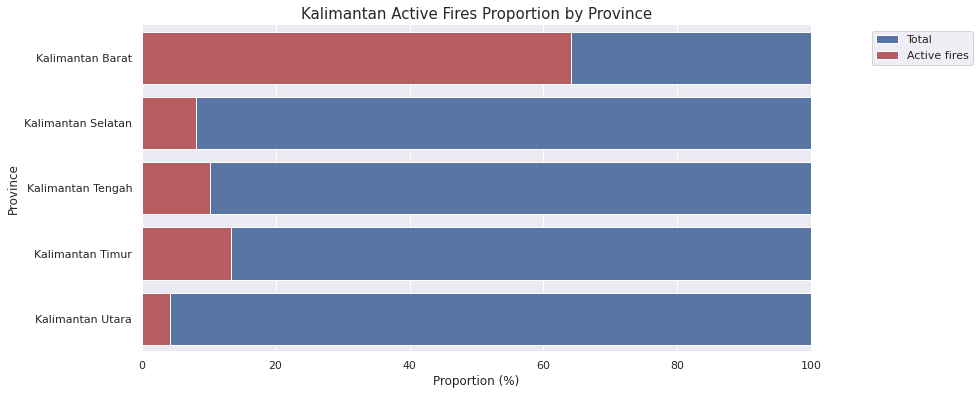

In [36]:
sns.set_theme(style="dark")
sns.set_style("darkgrid")

# init figure
f, ax = plt.subplots(figsize=(12, 6))

# plot
barplt = sns.barplot(x="total", y="province", data=df_crosstab,
                     label="Total", color="b")

barplt = sns.barplot(x="active-fires", y="province", data=df_crosstab,
                     label="Active fires", color="r")

# Add a legend and informative axis label
plt.title("Kalimantan Active Fires Proportion by Province", fontsize=15)
ax.legend(ncol=1, loc="upper right", bbox_to_anchor=(1.25,1))

# ax.set_xticks(ax.get_xticks()[::2])

ax.set(xlim=(0, 100), ylabel="Province", 
       xlabel="Proportion (%)")
sns.despine(left=True, bottom=True)

fig = barplt.get_figure()
fig.savefig("/content/gdrive/MyDrive/wildfires/active-fires-proportions.png") 

In [37]:
import plotly.express as px
fig = px.density_mapbox(df_gpd, lat='latitude', lon='longitude', z='frp', radius=5, hover_name="city",
                        center=dict(lat=1, lon=114), zoom=4.7, animation_frame="month", color_continuous_scale="Inferno",
                        mapbox_style="carto-darkmatter")

fig.update_layout(title_text = 'Kalimantan (Indonesia) Active Fires as Observed by VIIRS in 2021')
fig.update_layout(autosize=False, width=700, height=700)
fig.write_html("/content/gdrive/MyDrive/wildfires/active-fires-map.html")

fig.show()

This animated visualization uses a moving thirty-day of summed VIIRS measurments of fire radiative power (FRP), to present a view of fire intensities around the Kalimantan.

As we can see, there's a high concentration of active fires in West Kalimantan on July to October 2021. In the next project, we'll try to find out what's the causation these active fires rising on July to October. Is it because the temperature, or is another reason?